AIM:Program to implement k-NN classification using any standard dataset available in the 
public domain and find the accuracy of the algorithm.


In [ ]:
import seaborn as s
import pandas as p
import matplotlib.pyplot as m
import numpy as n

LOADING THE DATASET

In [ ]:
dataset=p.read_csv('/content/sonar_csv.csv')

In [ ]:
dataset.head(5)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

PREPROCESSING DATA SO THAT WE THE LAST COLUMN(Class) NEED NOT BE SENT IN AS INPUT using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
S=StandardScaler()

REMOVING Class COLOUMN USING drop() Fn axis=1 means its column

In [ ]:
S.fit(dataset.drop('Class',axis=1))

StandardScaler()

SCALLING THE FEATURES

In [ ]:
scaledfeatures=S.transform(dataset.drop('Class',axis=1))

In [ ]:
newdataset=p.DataFrame(scaledfeatures,columns=dataset.columns[:-1])

TRAINING & TESTING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=newdataset    #input
y=dataset.Class #output

DIVIDING THE DATASET INTO TEST AND TRAIN DATA
test_size=30%,random_state is set only to take the same set of random data for the next cycle

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)


IMPORT KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

SETTING THE NEIGHBOUR LIKE (K=1)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)

STARTS TRAINING WITH k=1

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

predicts the o/p with only giving test with inputs

In [ ]:
prediction=knn.predict(x_test)

CHECKING ACCURACY 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

Inorder to compare the accuracy we compare the predicted o/p in 'prediction' variable and its(x_test) actual o/p i.e,y_test

In [ ]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[26  4]
 [ 5 28]]
              precision    recall  f1-score   support

        Mine       0.84      0.87      0.85        30
        Rock       0.88      0.85      0.86        33

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.86        63
weighted avg       0.86      0.86      0.86        63



ITERATING THROUGH k INORDER TO FIND ITS VALUE SUCH THAT error rate IS AT min

In [ ]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  prediction_i=knn.predict(x_test)
  error_rate.append(n.mean(prediction_i != y_test))

Text(0, 0.5, 'Error rate')

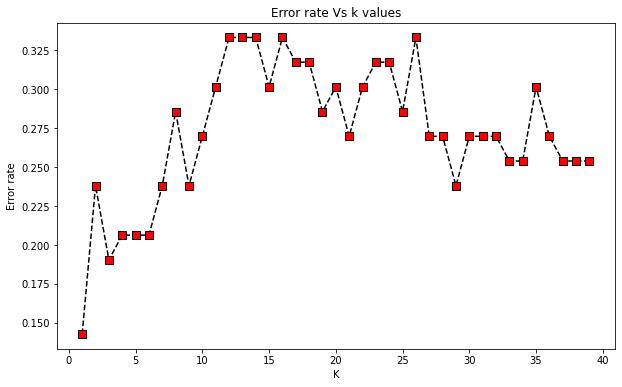

In [ ]:
m.figure(figsize=(10,6))
m.plot(range(1,40),error_rate,color='black',linestyle='dashed',marker='s',markerfacecolor='red',markersize=8)
m.title('Error rate Vs k values')
m.xlabel('K')
m.ylabel('Error rate')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))


[[26  4]
 [ 5 28]]
              precision    recall  f1-score   support

        Mine       0.84      0.87      0.85        30
        Rock       0.88      0.85      0.86        33

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.86        63
weighted avg       0.86      0.86      0.86        63

